# OpenSAFELY COVID Vaccine coverage report

OpenSAFELY is a new secure analytics platform for electronic patient records built on behalf of NHS England to deliver urgent academic and operational research during the pandemic. 

This is our regular weekly report on COVID-19 vaccination coverage in England using data from 40% of general practices that use TPP electronic health record software. **The data requires careful interpretation and there are a number of caveats. Please read the full detail about our methods and discussion of our earlier results (as of January 13th) in our preprint paper available [here](https://www.medrxiv.org/content/10.1101/2021.01.25.21250356v2).** 

The full analytical methods behind the latest results in this report are available [here](https://github.com/opensafely/nhs-covid-vaccination-uptake).

In [1]:
from datetime import datetime
from IPython.display import display, Markdown
import os
import pandas as pd
pd.set_option("display.max_rows", 200)

suffix = "_tpp"

display(Markdown(f"### Report last updated **{datetime.today().strftime('%d %b %Y')}**"))

with open(os.path.join("..", "interim-outputs","text", "latest_date.txt"), 'r') as file:
    latest_date_fmt = file.read()
    display(Markdown(f"### Vaccinations included up to **{latest_date_fmt}** inclusive"))

### Report last updated **19 Apr 2021**

### Vaccinations included up to **16 Apr 2021** inclusive

#### 
## Contents:
- **<a href=#summary>Overview</a>**
- **<a href=#summarychart>Summary Chart</a>**
- **Trends in vaccination coverage** according to demographic/clinical features, for:
 - <a href=#charts80>80+ population</a>
 - <a href=#charts70>70-79 population</a>
 - <a href=#charts_shield>shielding (aged 16-69) population</a>
 - <a href=#charts65>65-69 population</a>
 - <a href=#charts60>60-64 population</a>
 - <a href=#charts55>55-59 population</a>
 - <a href=#charts50>50-54 population</a>
- **<a href=#tables>Current vaccination coverage of each eligible population group, according to demographic/clinical features</a>**<br />
  - Includes each of the groups above, plus care home (65+) and LD (aged 16-64) populations.
- Appendix: <a href=#ethnicity>Proportion of each population group for whom ethnicity is known</a>

# 
## Overview of Vaccination Figures to date <a name='summary' />

In [2]:
import json
summary_stats_1 = pd.read_csv(os.path.join("..", "interim-outputs","text", "summary_stats_first_dose.txt")).set_index("Unnamed: 0")
summary_stats_2 = pd.read_csv(os.path.join("..", "interim-outputs","text", "summary_stats_second_dose.txt")).set_index("Unnamed: 0")
additional_stats = pd.read_csv(os.path.join("..", "interim-outputs","text", "additional_stats_first_dose.txt")).set_index("Unnamed: 0")

out = summary_stats_1.join(summary_stats_2)
out.index = out.index.rename("Group")
display(out)

display(Markdown(f"##### \n" 
                 "**NB** Patient counts are rounded to nearest 7\n"
                "##### \n" ))

display(Markdown(f"### Vaccine types and second doses" ))

for x in additional_stats.index:  
    display(Markdown(f"{x}: {additional_stats.loc[x][0]}\n"))
    
    


display(Markdown(f"##### \n"
                 "### Group definitions \n - The **care home** group is defined based on patients (aged 65+) having one of [these codes](https://codelists.opensafely.org/codelist/primis-covid19-vacc-uptake/longres/v1/).\n"
                 "\n- The **shielding** group is defined based on patients having one of [these codes](https://codelists.opensafely.org/codelist/primis-covid19-vacc-uptake/shield/v1/) \
                 provided it was not superceded by one of [these codes](https://codelists.opensafely.org/codelist/primis-covid19-vacc-uptake/nonshield/v1/).\n"                
                "\n- The **LD** (learning disability) group is defined based on [this](https://codelists.opensafely.org/codelist/primis-covid19-vacc-uptake/learndis/v1/)\
                codelist and excludes people who are shielding.\n"
                 "\n- Patients are counted in their highest risk category only; e.g. a 65-year-old who is shielding \
                is only counted in the shielding group, not in the 65-69 population\n"))

first dose as at 16 Apr 2021  \
Group                                                                    
Total vaccinated in TPP                                         19,999   
80+                                               40.7% (833 of 2,044)   
70-79                                           39.4% (1,351 of 3,437)   
care home                                         40.0% (553 of 1,386)   
shielding (aged 16-69)                              41.5% (182 of 434)   
65-69                                             39.3% (861 of 2,184)   
LD (aged 16-64)                                     41.6% (343 of 826)   
60-64                                           39.7% (1,078 of 2,716)   
55-59                                           39.8% (1,267 of 3,192)   
50-54                                           40.5% (1,379 of 3,402)   
16-49, not in other eligible groups shown                       12,152   

                                          second dose as at 16 Apr 2021  
Group                                                                    
Total vaccinated in TPP                                           4,998  
80+                                                10.4% (210 of 2,044)  
70-79                                               9.0% (308 of 3,437)  
care home                                          10.2% (140 of 1,386)  
shielding (aged 16-69)                                 9.9% (42 of 434)  
65-69                                               9.5% (210 of 2,184)  
LD (aged 16-64)                                        7.9% (63 of 826)  
60-64                                               9.5% (259 of 2,716)  
55-59                                               9.8% (315 of 3,192)  
50-54                                              10.9% (371 of 3,402)  
16-49, not in other eligible groups shown                         3,080

##### 
**NB** Patient counts are rounded to nearest 7
##### 


### Vaccine types and second doses

Second doses (% of all vaccinated): **25.0%** (4,998)


Oxford-AZ vaccines (% of all first doses): **0.0%** (0)


Moderna vaccines (% of all first doses): **0.0%** (7)


##### 
### Group definitions 
 - The **care home** group is defined based on patients (aged 65+) having one of [these codes](https://codelists.opensafely.org/codelist/primis-covid19-vacc-uptake/longres/v1/).

- The **shielding** group is defined based on patients having one of [these codes](https://codelists.opensafely.org/codelist/primis-covid19-vacc-uptake/shield/v1/)                  provided it was not superceded by one of [these codes](https://codelists.opensafely.org/codelist/primis-covid19-vacc-uptake/nonshield/v1/).

- The **LD** (learning disability) group is defined based on [this](https://codelists.opensafely.org/codelist/primis-covid19-vacc-uptake/learndis/v1/)                codelist and excludes people who are shielding.

- Patients are counted in their highest risk category only; e.g. a 65-year-old who is shielding                 is only counted in the shielding group, not in the 65-69 population


# 

## Summary Chart <a name='summarychart' />

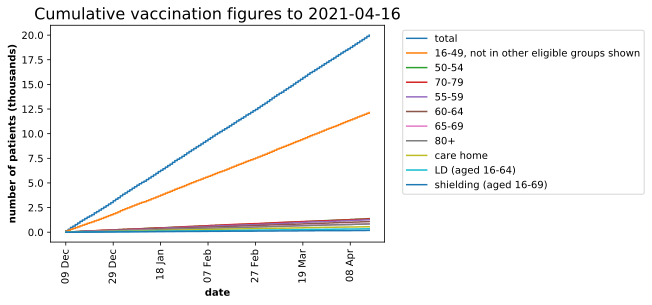

In [3]:
import sys
sys.path.append('../lib/')
from create_report import *

show_chart(filepath="Cumulative vaccination figures.svg", title="off")

## Trends in vaccination rates of 80+ population according to demographic/clinical features, cumulatively by day. <a name='charts80' />
**\*_Latest overall cohort rate_ calculated as at latest date for vaccinations recorded across all TPP practices.**


## 80+ population

###  COVID vaccinations among 80+ population
 ### by Sex

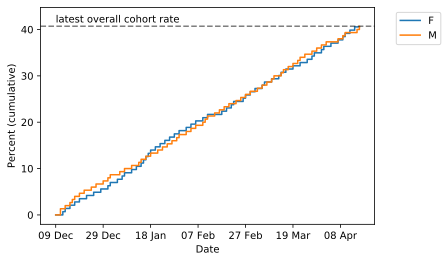

### DateCOVID vaccinations among 80+ population
 ### by Sex

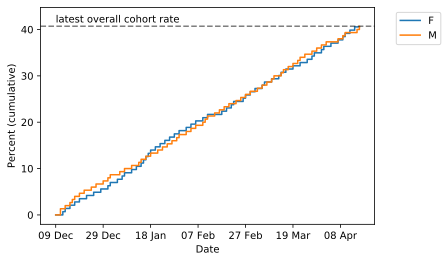

###  COVID vaccinations among 80+ population
 ### by Ethnicity (broad categories)

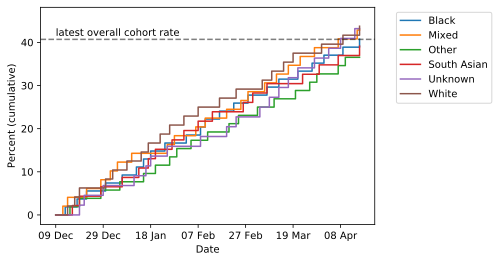

### DateCOVID vaccinations among 80+ population
 ### by Ethnicity (broad categories)

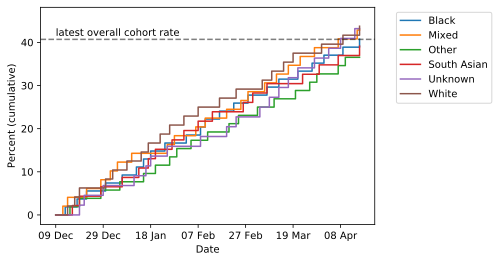

###  COVID vaccinations among 80+ population
 ### by Index of Multiple Deprivation (quintiles)

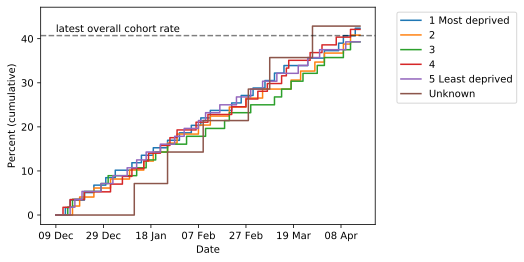

### DateCOVID vaccinations among 80+ population
 ### by Index of Multiple Deprivation (quintiles)

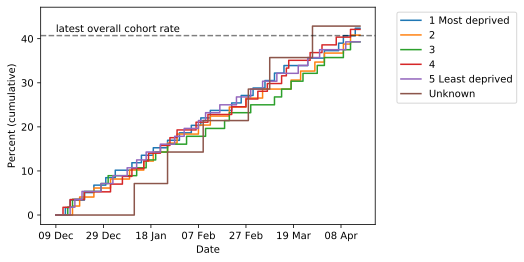

###  COVID vaccinations among 80+ population
 ### by BMI

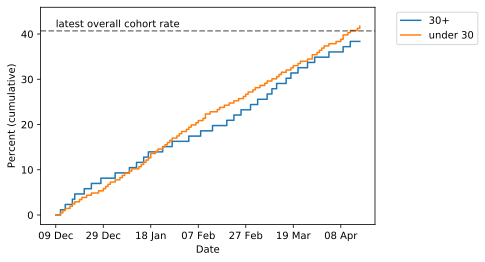

### DateCOVID vaccinations among 80+ population
 ### by BMI

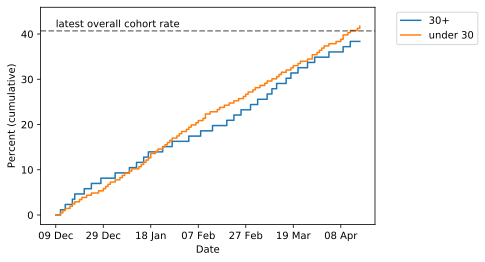

###  COVID vaccinations among 80+ population
 ### by Chronic cardiac disease

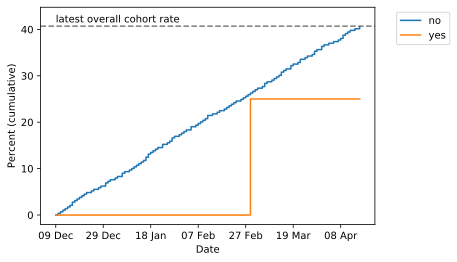

### DateCOVID vaccinations among 80+ population
 ### by Chronic cardiac disease

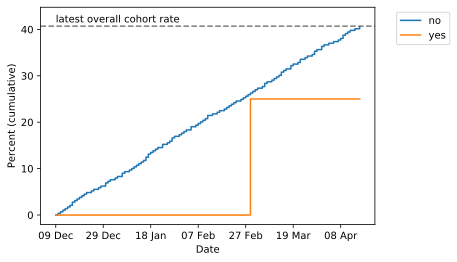

###  COVID vaccinations among 80+ population
 ### by Current COPD

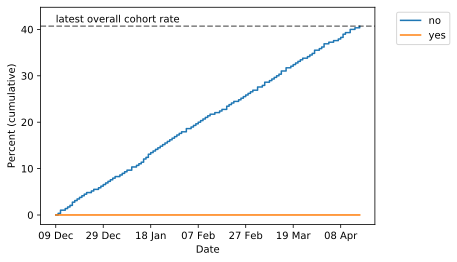

### DateCOVID vaccinations among 80+ population
 ### by Current COPD

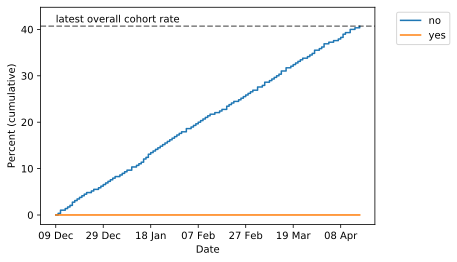

###  COVID vaccinations among 80+ population
 ### by Dialysis

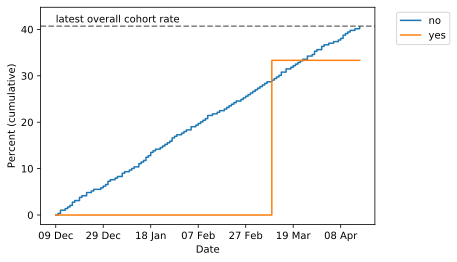

### DateCOVID vaccinations among 80+ population
 ### by Dialysis

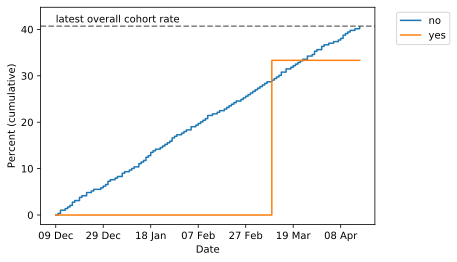

###  COVID vaccinations among 80+ population
 ### by Dementia

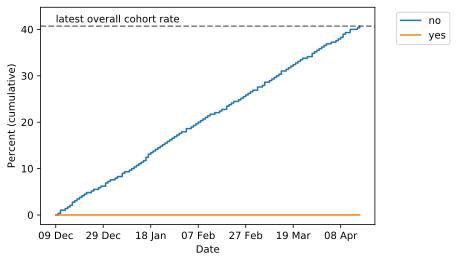

### DateCOVID vaccinations among 80+ population
 ### by Dementia

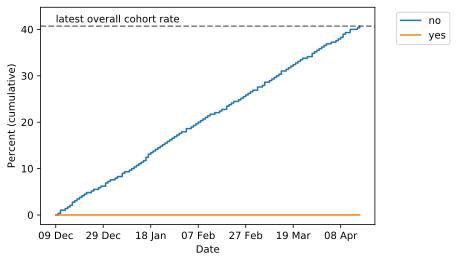

###  COVID vaccinations among 80+ population
 ### by Learning disability

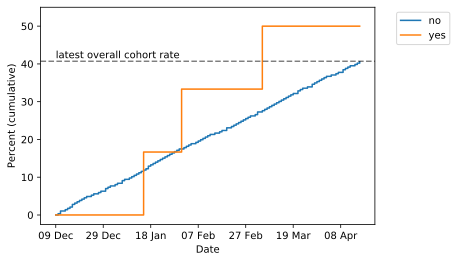

### DateCOVID vaccinations among 80+ population
 ### by Learning disability

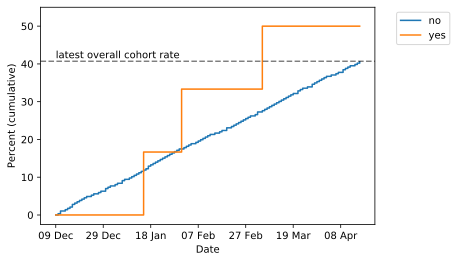

###  COVID vaccinations among 80+ population
 ### by Psychosis, schizophrenia, or bipolar

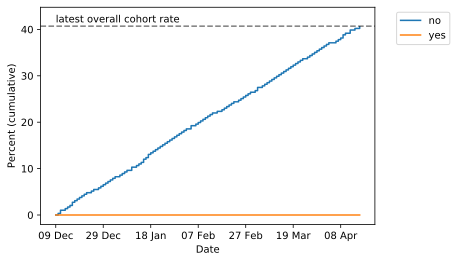

### DateCOVID vaccinations among 80+ population
 ### by Psychosis, schizophrenia, or bipolar

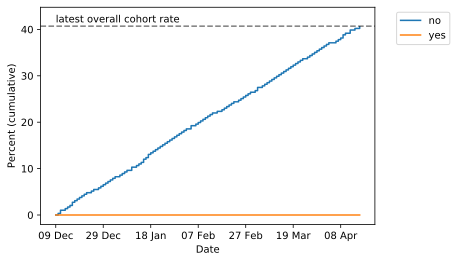

###  COVID vaccinations among 80+ population
 ### by SSRI (last 12 months)

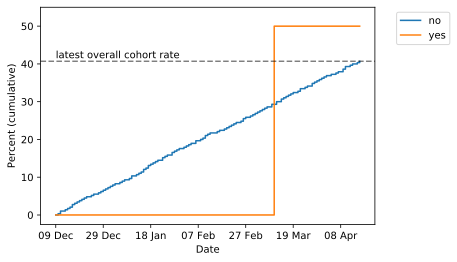

### DateCOVID vaccinations among 80+ population
 ### by SSRI (last 12 months)

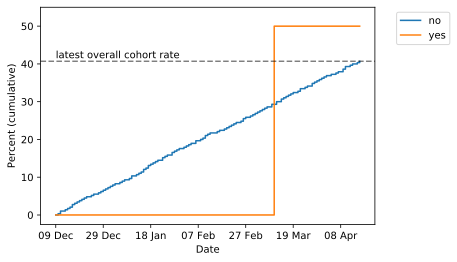

###  COVID vaccinations among 80+ population
 ### by Age band

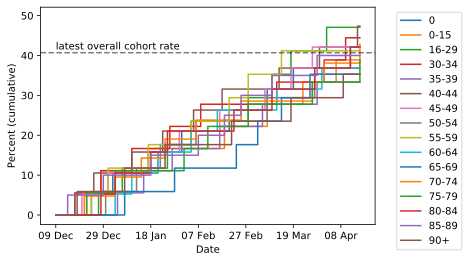

### DateCOVID vaccinations among 80+ population
 ### by Age band

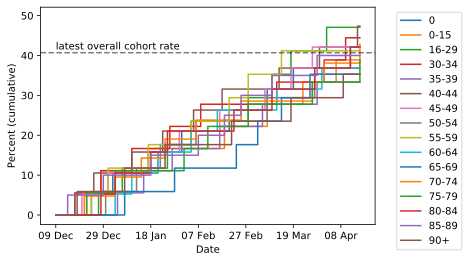

In [4]:
chartlist = find_and_sort_filenames(foldername="figures")
   
display(Markdown("## 80+ population"))
for item in chartlist:
    show_chart(item)


## Trends in vaccination rates of 70-79 population according to demographic/clinical features, cumulatively by day. <a name='charts70' />
**\*National rate calculated as at latest date for vaccinations recorded across all TPP practices.**


## 70-79 population

###  COVID vaccinations among 70-79 population
 ### by Sex

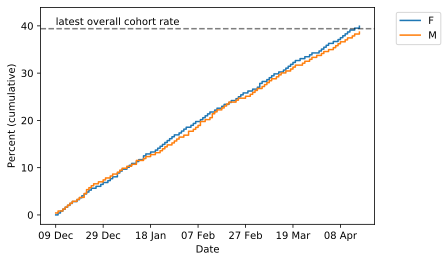

### DateCOVID vaccinations among 70-79 population
 ### by Sex

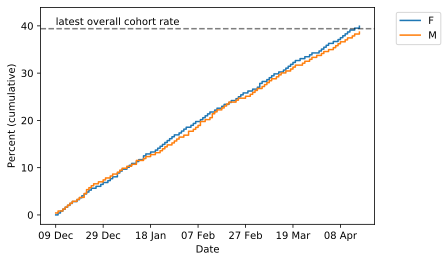

###  COVID vaccinations among 70-79 population
 ### by Ethnicity (broad categories)

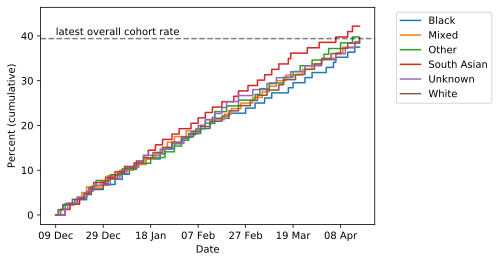

### DateCOVID vaccinations among 70-79 population
 ### by Ethnicity (broad categories)

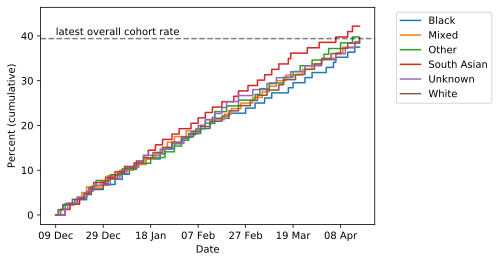

###  COVID vaccinations among 70-79 population
 ### by Index of Multiple Deprivation (quintiles)

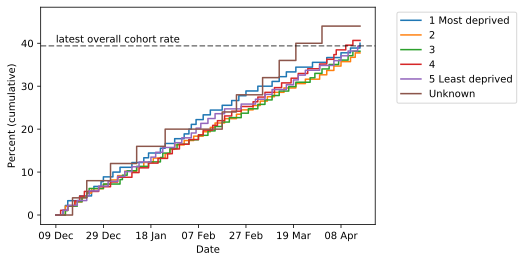

### DateCOVID vaccinations among 70-79 population
 ### by Index of Multiple Deprivation (quintiles)

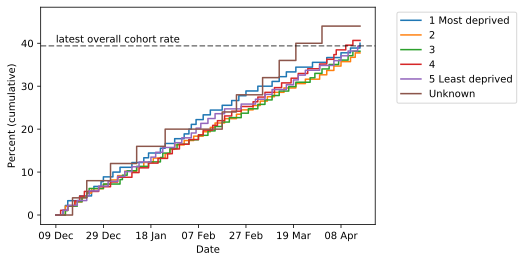

###  COVID vaccinations among 70-79 population
 ### by BMI

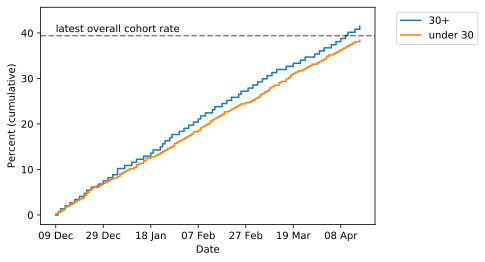

### DateCOVID vaccinations among 70-79 population
 ### by BMI

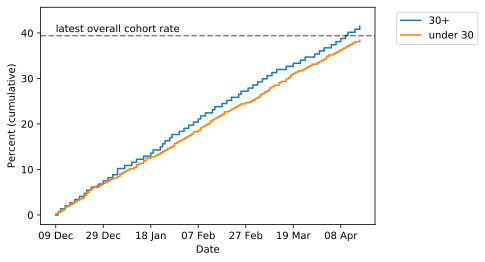

###  COVID vaccinations among 70-79 population
 ### by Chronic cardiac disease

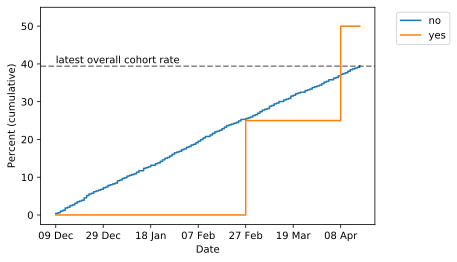

### DateCOVID vaccinations among 70-79 population
 ### by Chronic cardiac disease

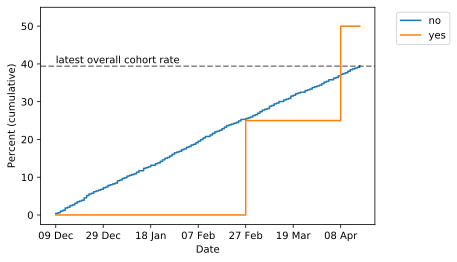

###  COVID vaccinations among 70-79 population
 ### by Current COPD

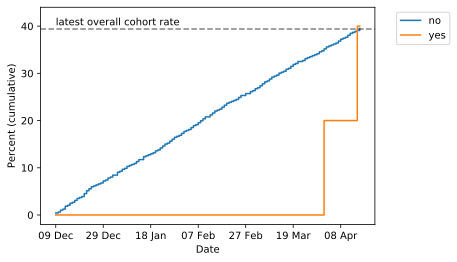

### DateCOVID vaccinations among 70-79 population
 ### by Current COPD

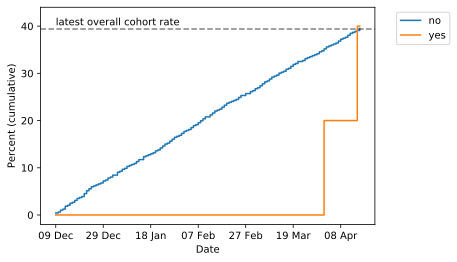

###  COVID vaccinations among 70-79 population
 ### by Dialysis

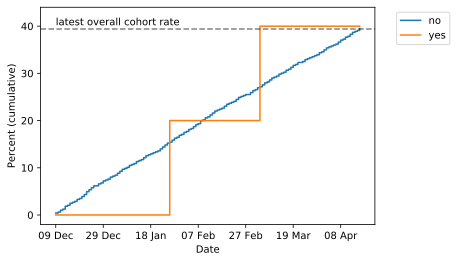

### DateCOVID vaccinations among 70-79 population
 ### by Dialysis

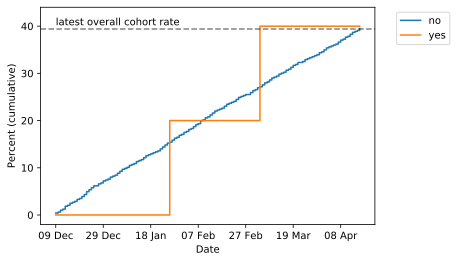

###  COVID vaccinations among 70-79 population
 ### by Dementia

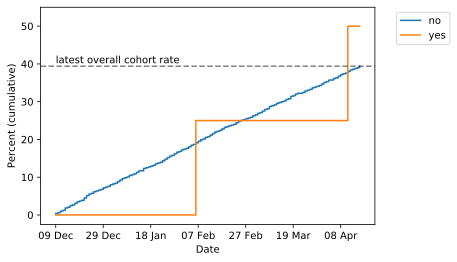

### DateCOVID vaccinations among 70-79 population
 ### by Dementia

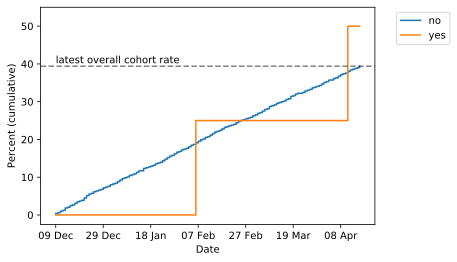

###  COVID vaccinations among 70-79 population
 ### by Learning disability

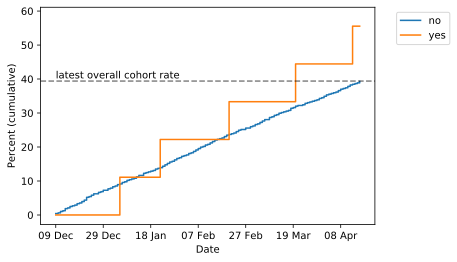

### DateCOVID vaccinations among 70-79 population
 ### by Learning disability

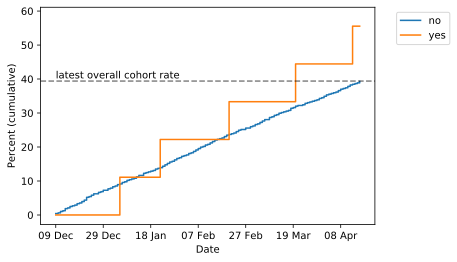

###  COVID vaccinations among 70-79 population
 ### by Psychosis, schizophrenia, or bipolar

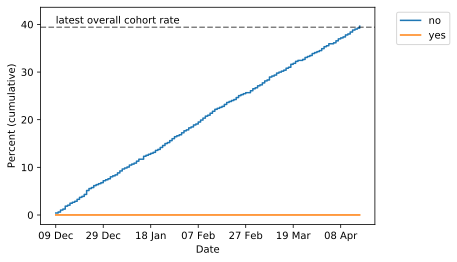

### DateCOVID vaccinations among 70-79 population
 ### by Psychosis, schizophrenia, or bipolar

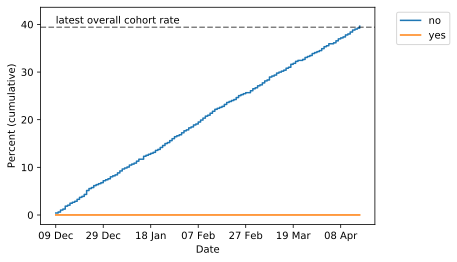

###  COVID vaccinations among 70-79 population
 ### by SSRI (last 12 months)

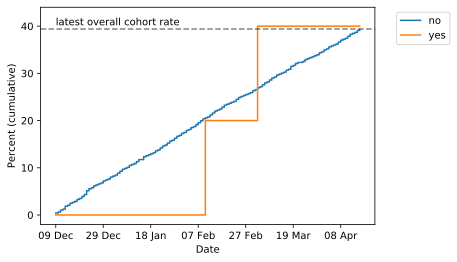

### DateCOVID vaccinations among 70-79 population
 ### by SSRI (last 12 months)

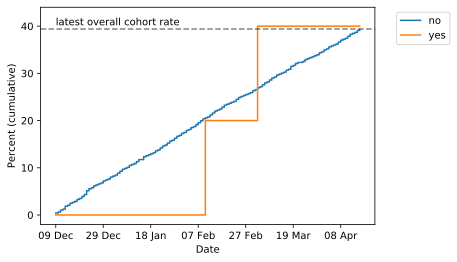

###  COVID vaccinations among 70-79 population
 ### by Age band

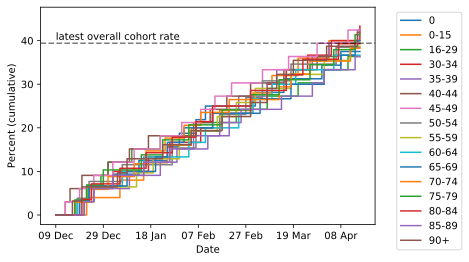

### DateCOVID vaccinations among 70-79 population
 ### by Age band

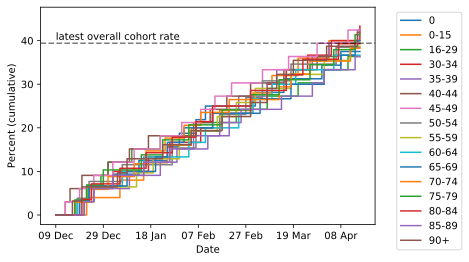

In [5]:
    
display(Markdown("## 70-79 population"))
chartlist2 = find_and_sort_filenames(foldername="figures", population_subset="70-79")
    
for item in chartlist2:
    show_chart(item)    

## 
## Trends in vaccination rates of **shielding** population according to demographic/clinical features, cumulatively by day. <a name='charts_shield' />
**\*National rate calculated as at latest date for vaccinations recorded across all TPP practices.**

## Shielding population (aged 16-69)

###  COVID vaccinations among shielding (aged 16-69) population
 ### by newly shielded since feb 15

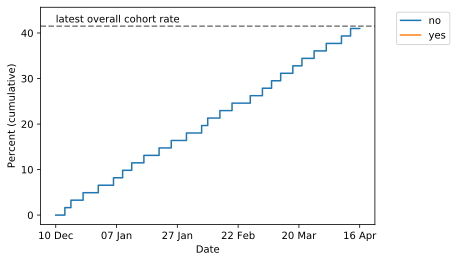

### DateCOVID vaccinations among shielding (aged 16-69) population
 ### by newly shielded since feb 15

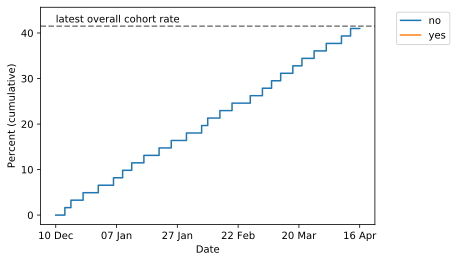

###  COVID vaccinations among shielding (aged 16-69) population
 ### by Age band

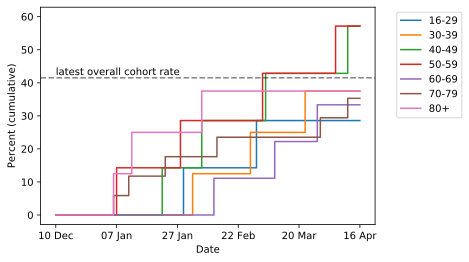

### DateCOVID vaccinations among shielding (aged 16-69) population
 ### by Age band

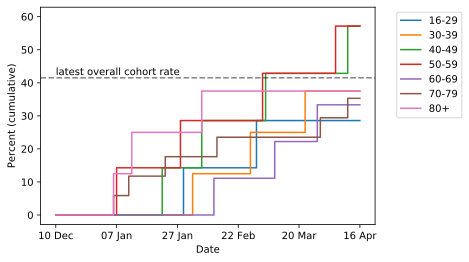

###  COVID vaccinations among shielding (aged 16-69) population
 ### by Sex

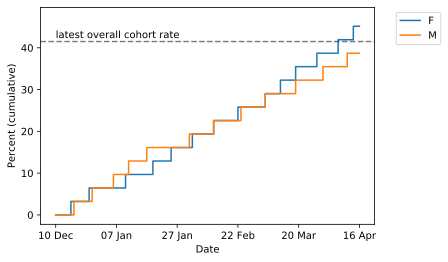

### DateCOVID vaccinations among shielding (aged 16-69) population
 ### by Sex

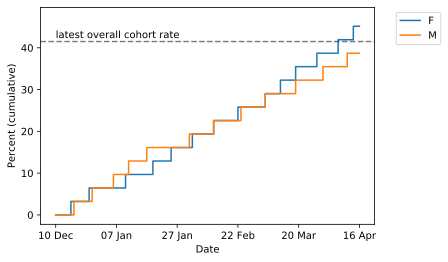

###  COVID vaccinations among shielding (aged 16-69) population
 ### by Ethnicity (broad categories)

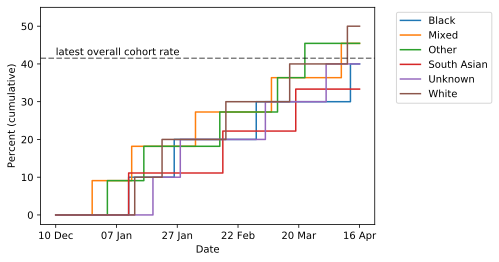

### DateCOVID vaccinations among shielding (aged 16-69) population
 ### by Ethnicity (broad categories)

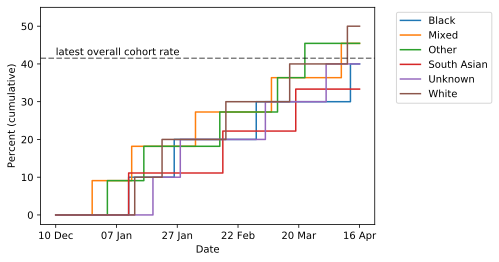

###  COVID vaccinations among shielding (aged 16-69) population
 ### by Index of Multiple Deprivation (quintiles)

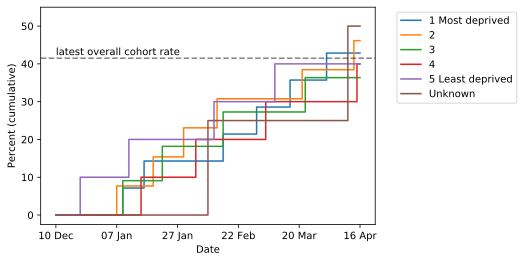

### DateCOVID vaccinations among shielding (aged 16-69) population
 ### by Index of Multiple Deprivation (quintiles)

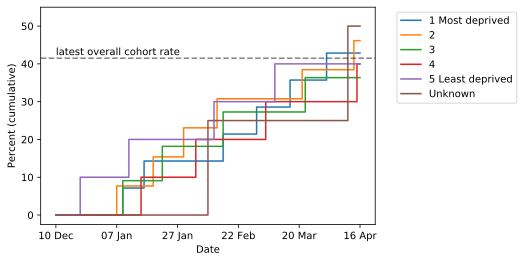

###  COVID vaccinations among shielding (aged 16-69) population
 ### by Learning disability

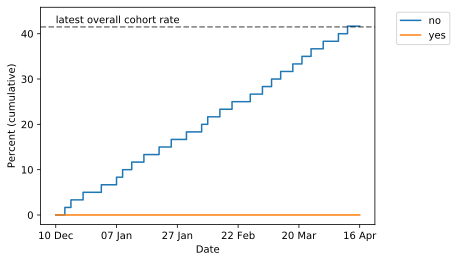

### DateCOVID vaccinations among shielding (aged 16-69) population
 ### by Learning disability

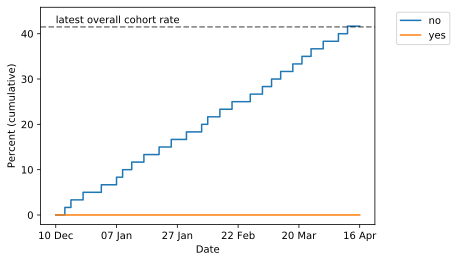

In [6]:
    
display(Markdown("## Shielding population (aged 16-69)"))
chartlist2 = find_and_sort_filenames(foldername="figures", population_subset="shielding (aged 16-69)")
    
for item in chartlist2:
    show_chart(item)    

## 
## Trends in vaccination rates of 65-69 population according to demographic/clinical features, cumulatively by day. <a name='charts65' />
**\*National rate calculated as at latest date for vaccinations recorded across all TPP practices.**

## 65-69 population

###  COVID vaccinations among 65-69 population
 ### by Sex

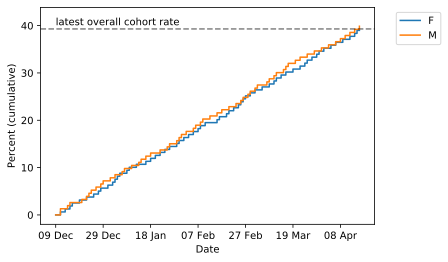

### DateCOVID vaccinations among 65-69 population
 ### by Sex

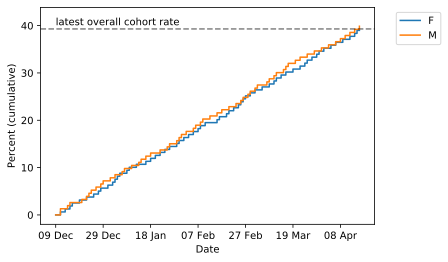

###  COVID vaccinations among 65-69 population
 ### by Ethnicity (broad categories)

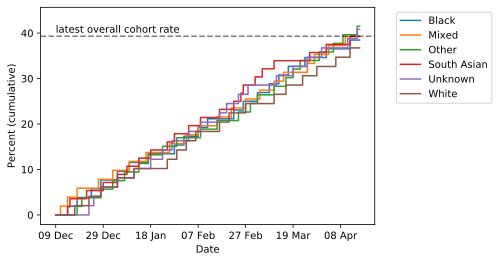

### DateCOVID vaccinations among 65-69 population
 ### by Ethnicity (broad categories)

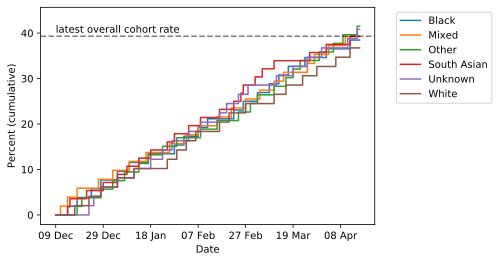

###  COVID vaccinations among 65-69 population
 ### by Index of Multiple Deprivation (quintiles)

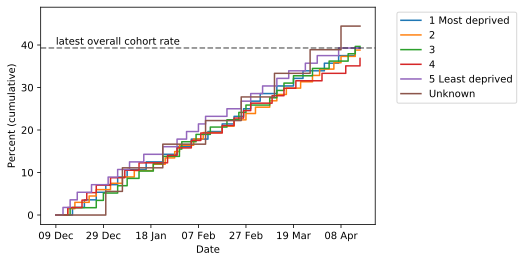

### DateCOVID vaccinations among 65-69 population
 ### by Index of Multiple Deprivation (quintiles)

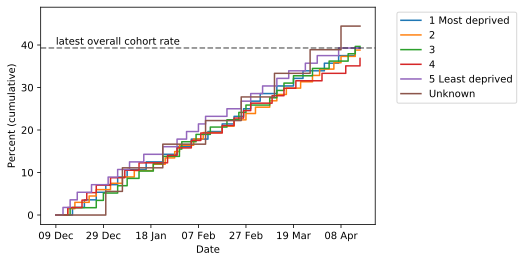

###  COVID vaccinations among 65-69 population
 ### by BMI

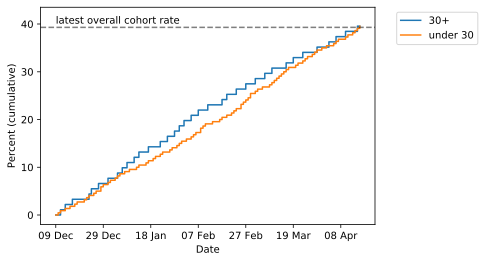

### DateCOVID vaccinations among 65-69 population
 ### by BMI

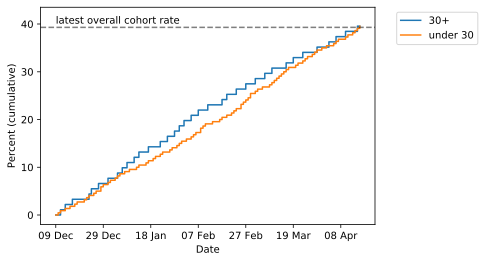

###  COVID vaccinations among 65-69 population
 ### by Chronic cardiac disease

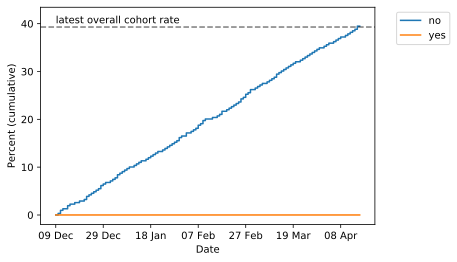

### DateCOVID vaccinations among 65-69 population
 ### by Chronic cardiac disease

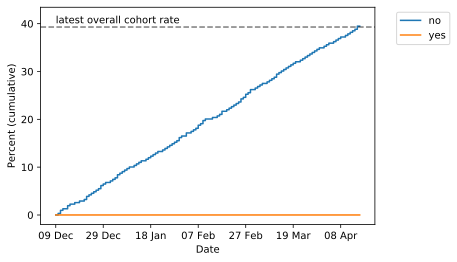

###  COVID vaccinations among 65-69 population
 ### by Current COPD

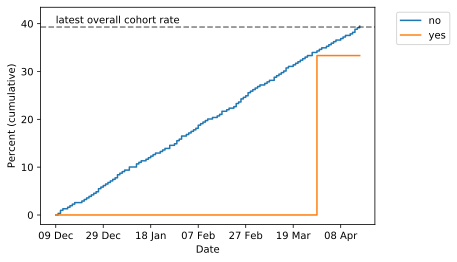

### DateCOVID vaccinations among 65-69 population
 ### by Current COPD

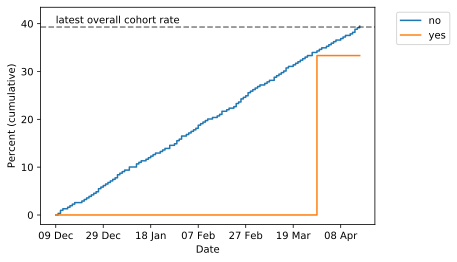

###  COVID vaccinations among 65-69 population
 ### by Dementia

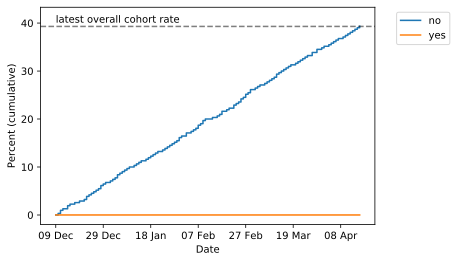

### DateCOVID vaccinations among 65-69 population
 ### by Dementia

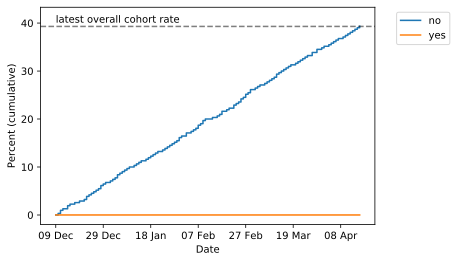

###  COVID vaccinations among 65-69 population
 ### by Learning disability

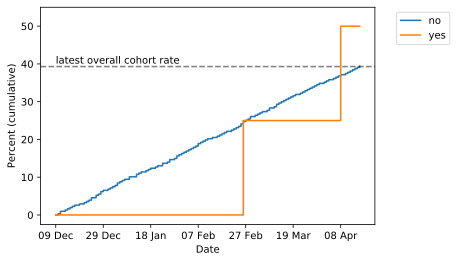

### DateCOVID vaccinations among 65-69 population
 ### by Learning disability

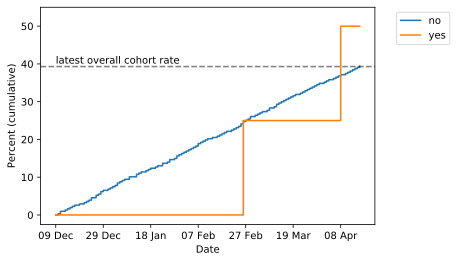

###  COVID vaccinations among 65-69 population
 ### by Psychosis, schizophrenia, or bipolar

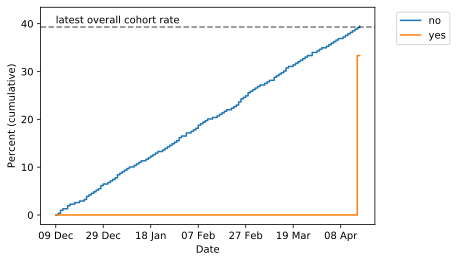

### DateCOVID vaccinations among 65-69 population
 ### by Psychosis, schizophrenia, or bipolar

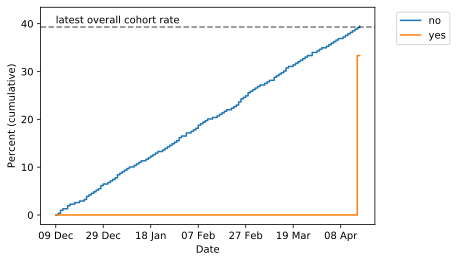

###  COVID vaccinations among 65-69 population
 ### by SSRI (last 12 months)

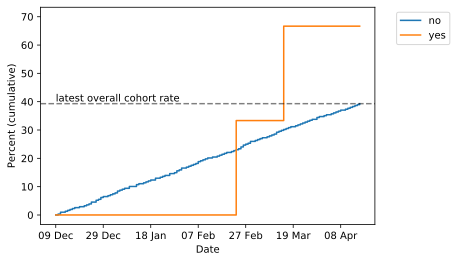

### DateCOVID vaccinations among 65-69 population
 ### by SSRI (last 12 months)

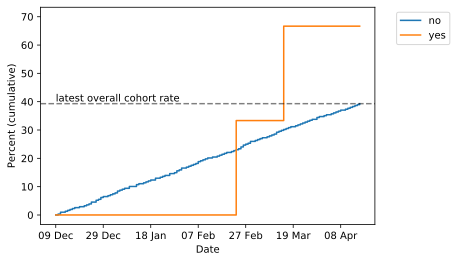

In [7]:
    
display(Markdown("## 65-69 population"))
chartlist2 = find_and_sort_filenames(foldername="figures", population_subset="65-69")
    
for item in chartlist2:
    show_chart(item)    

## 
## Trends in vaccination rates of 60-64 population according to demographic/clinical features, cumulatively by day. <a name='charts60' />
**\*National rate calculated as at latest date for vaccinations recorded across all TPP practices.**

## 60-64 population

###  COVID vaccinations among 60-64 population
 ### by Sex

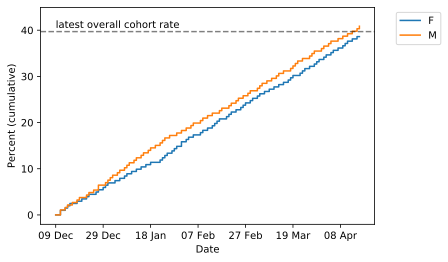

### DateCOVID vaccinations among 60-64 population
 ### by Sex

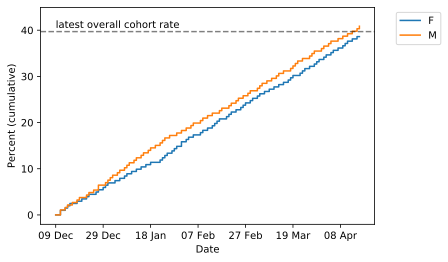

###  COVID vaccinations among 60-64 population
 ### by Ethnicity (broad categories)

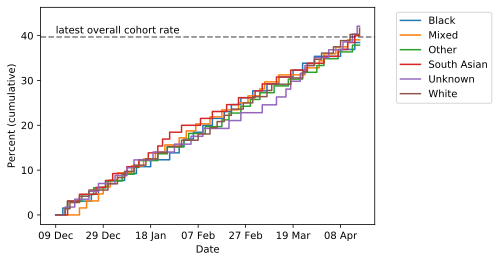

### DateCOVID vaccinations among 60-64 population
 ### by Ethnicity (broad categories)

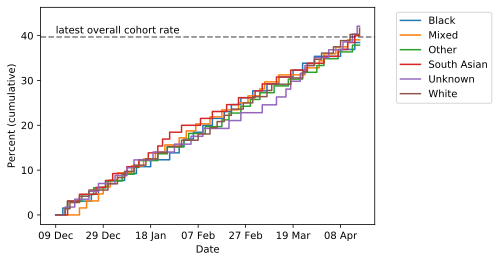

###  COVID vaccinations among 60-64 population
 ### by Index of Multiple Deprivation (quintiles)

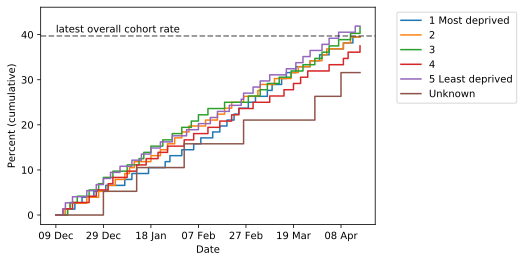

### DateCOVID vaccinations among 60-64 population
 ### by Index of Multiple Deprivation (quintiles)

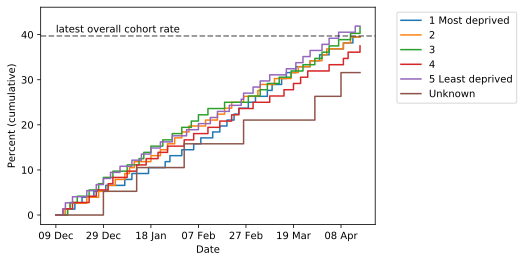

###  COVID vaccinations among 60-64 population
 ### by BMI

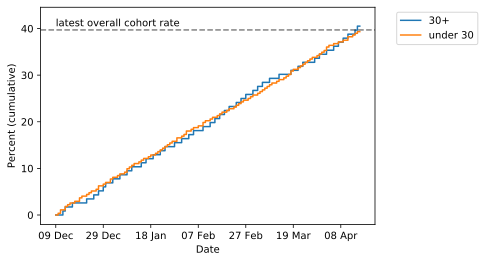

### DateCOVID vaccinations among 60-64 population
 ### by BMI

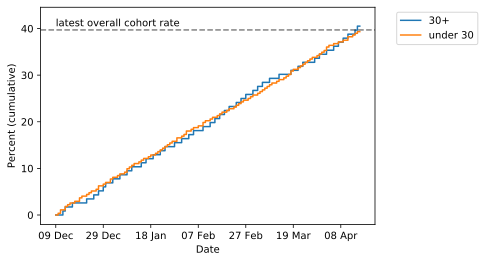

###  COVID vaccinations among 60-64 population
 ### by Chronic cardiac disease

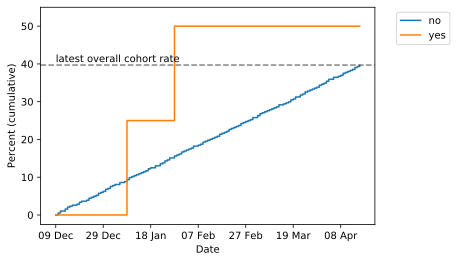

### DateCOVID vaccinations among 60-64 population
 ### by Chronic cardiac disease

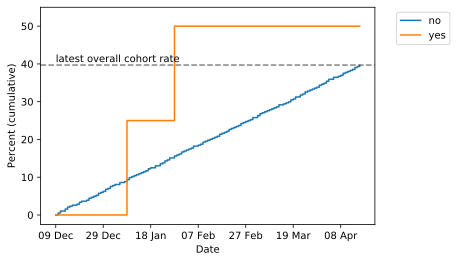

###  COVID vaccinations among 60-64 population
 ### by Current COPD

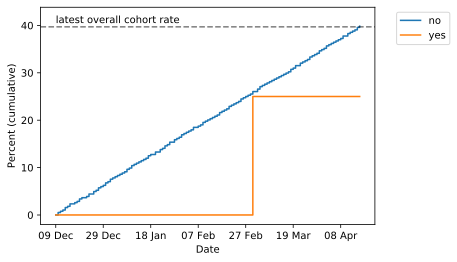

### DateCOVID vaccinations among 60-64 population
 ### by Current COPD

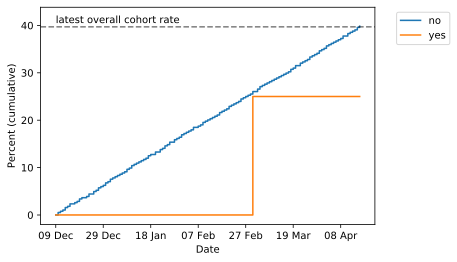

###  COVID vaccinations among 60-64 population
 ### by Dementia

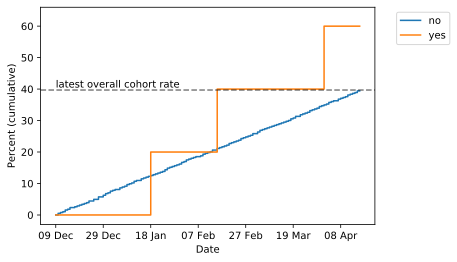

### DateCOVID vaccinations among 60-64 population
 ### by Dementia

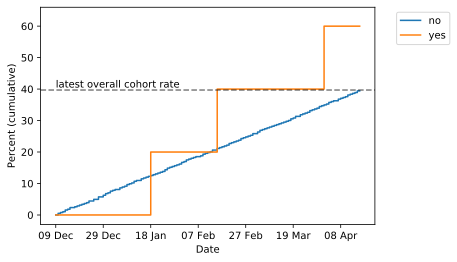

###  COVID vaccinations among 60-64 population
 ### by Psychosis, schizophrenia, or bipolar

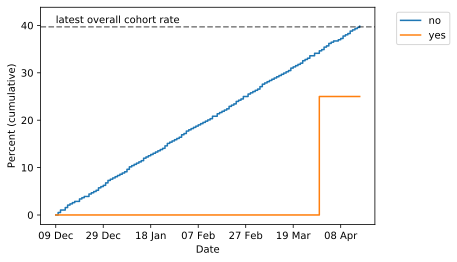

### DateCOVID vaccinations among 60-64 population
 ### by Psychosis, schizophrenia, or bipolar

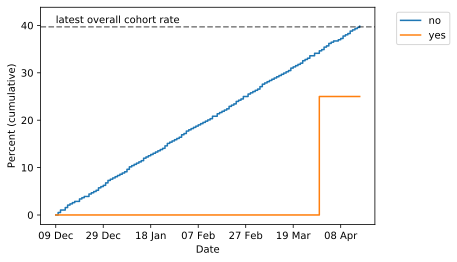

###  COVID vaccinations among 60-64 population
 ### by SSRI (last 12 months)

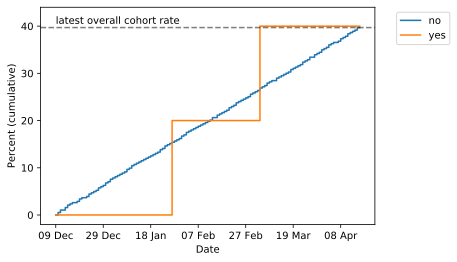

### DateCOVID vaccinations among 60-64 population
 ### by SSRI (last 12 months)

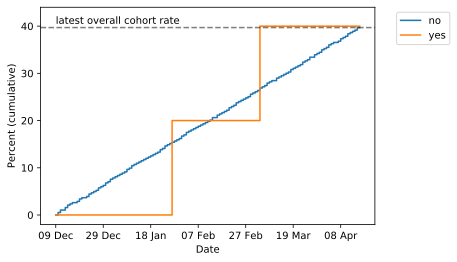

In [8]:
display(Markdown("## 60-64 population"))
chartlist2 = find_and_sort_filenames(foldername="figures", population_subset="60-64")
    
for item in chartlist2:
    show_chart(item)    

## 
## Trends in vaccination rates of 55-59 population according to demographic/clinical features, cumulatively by day. <a name='charts55' />
**\*National rate calculated as at latest date for vaccinations recorded across all TPP practices.**

## 55-59 population

###  COVID vaccinations among 55-59 population
 ### by Sex

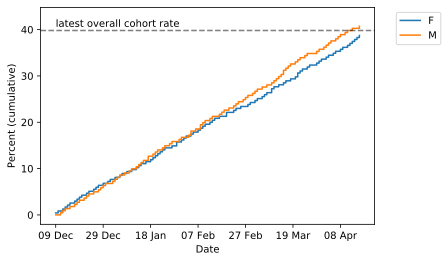

### DateCOVID vaccinations among 55-59 population
 ### by Sex

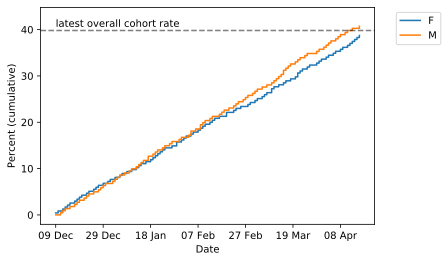

###  COVID vaccinations among 55-59 population
 ### by Ethnicity (broad categories)

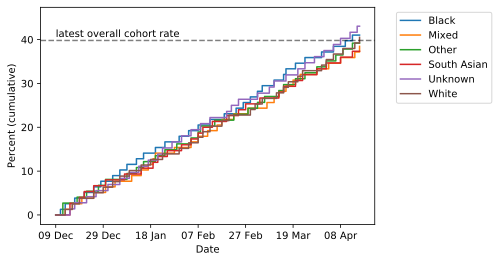

### DateCOVID vaccinations among 55-59 population
 ### by Ethnicity (broad categories)

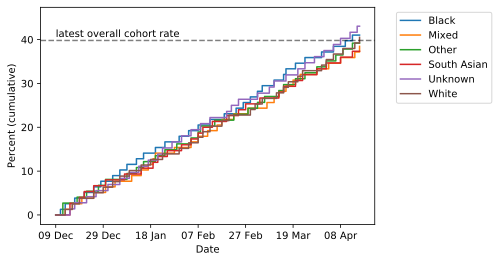

###  COVID vaccinations among 55-59 population
 ### by Index of Multiple Deprivation (quintiles)

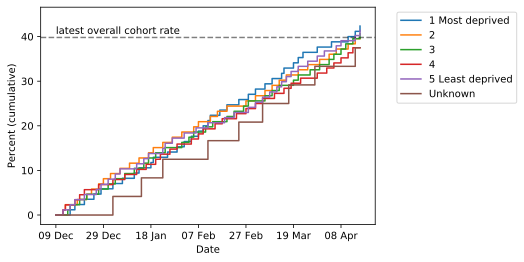

### DateCOVID vaccinations among 55-59 population
 ### by Index of Multiple Deprivation (quintiles)

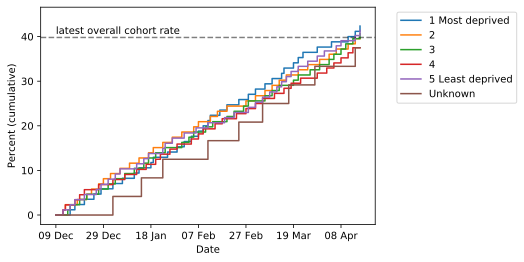

###  COVID vaccinations among 55-59 population
 ### by BMI

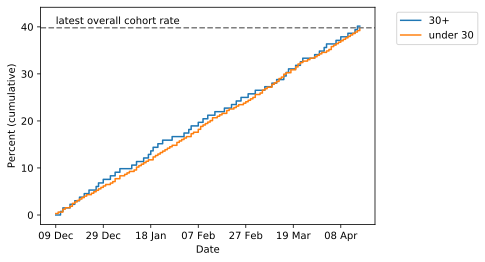

### DateCOVID vaccinations among 55-59 population
 ### by BMI

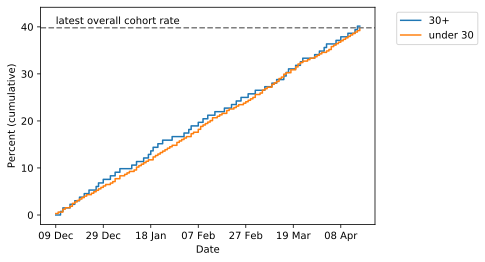

###  COVID vaccinations among 55-59 population
 ### by Chronic cardiac disease

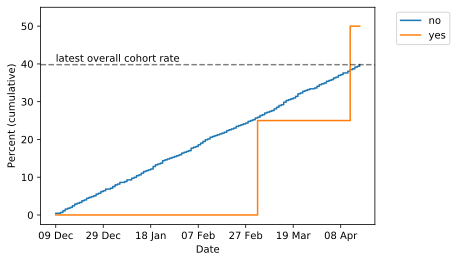

### DateCOVID vaccinations among 55-59 population
 ### by Chronic cardiac disease

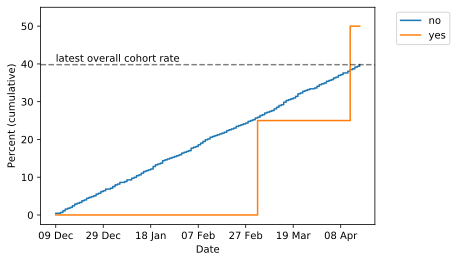

###  COVID vaccinations among 55-59 population
 ### by Current COPD

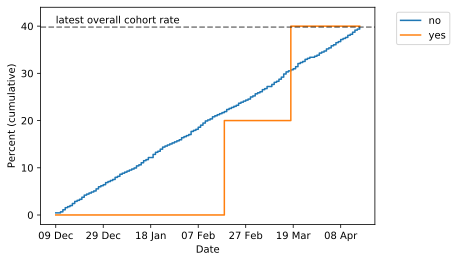

### DateCOVID vaccinations among 55-59 population
 ### by Current COPD

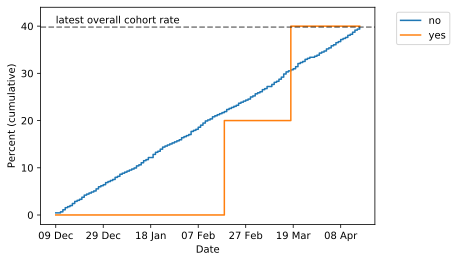

###  COVID vaccinations among 55-59 population
 ### by Psychosis, schizophrenia, or bipolar

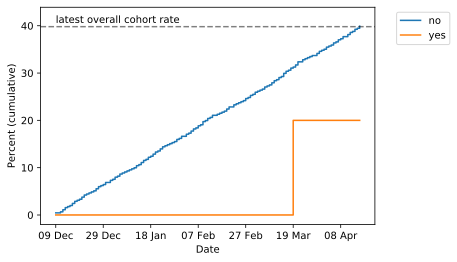

### DateCOVID vaccinations among 55-59 population
 ### by Psychosis, schizophrenia, or bipolar

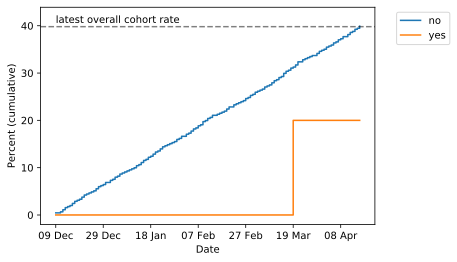

###  COVID vaccinations among 55-59 population
 ### by SSRI (last 12 months)

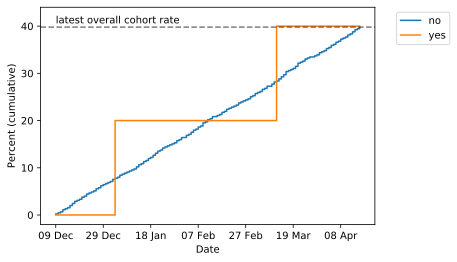

### DateCOVID vaccinations among 55-59 population
 ### by SSRI (last 12 months)

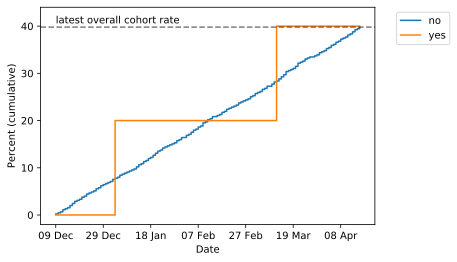

In [9]:
display(Markdown("## 55-59 population"))
chartlist2 = find_and_sort_filenames(foldername="figures", population_subset="55-59")
    
for item in chartlist2:
    show_chart(item)    

## 
## Trends in vaccination rates of 50-54 population according to demographic/clinical features, cumulatively by day. <a name='charts50' />
**\*National rate calculated as at latest date for vaccinations recorded across all TPP practices.**

## 50-54 population

###  COVID vaccinations among 50-54 population
 ### by Sex

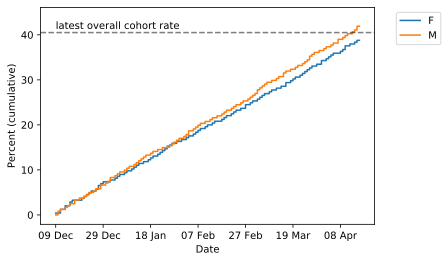

### DateCOVID vaccinations among 50-54 population
 ### by Sex

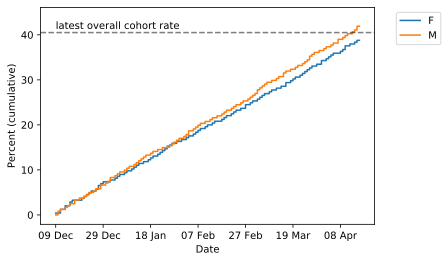

###  COVID vaccinations among 50-54 population
 ### by Ethnicity (broad categories)

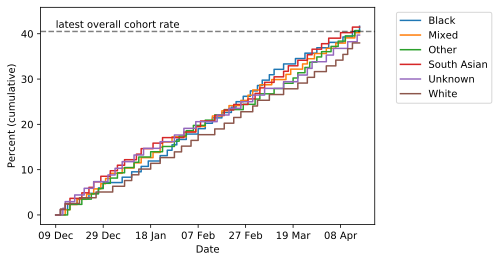

### DateCOVID vaccinations among 50-54 population
 ### by Ethnicity (broad categories)

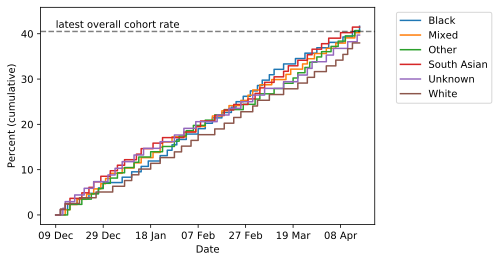

###  COVID vaccinations among 50-54 population
 ### by Index of Multiple Deprivation (quintiles)

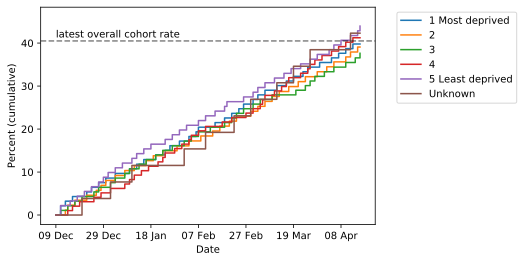

### DateCOVID vaccinations among 50-54 population
 ### by Index of Multiple Deprivation (quintiles)

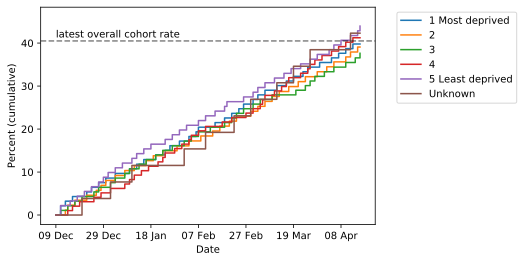

###  COVID vaccinations among 50-54 population
 ### by BMI

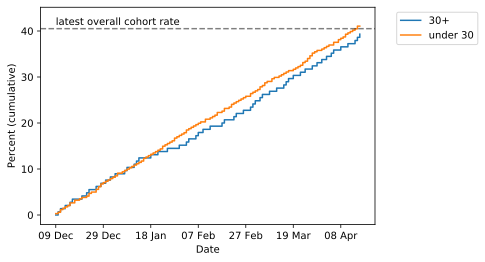

### DateCOVID vaccinations among 50-54 population
 ### by BMI

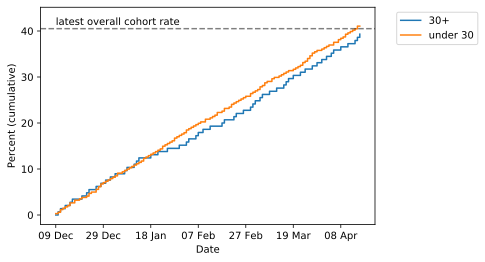

###  COVID vaccinations among 50-54 population
 ### by Chronic cardiac disease

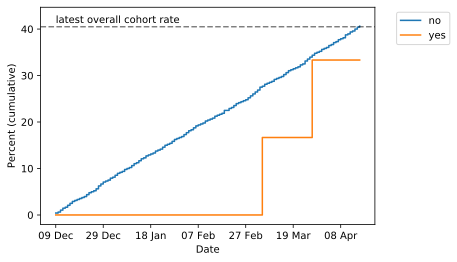

### DateCOVID vaccinations among 50-54 population
 ### by Chronic cardiac disease

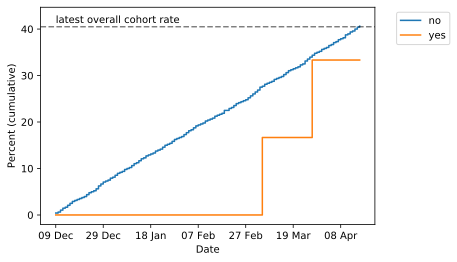

###  COVID vaccinations among 50-54 population
 ### by Current COPD

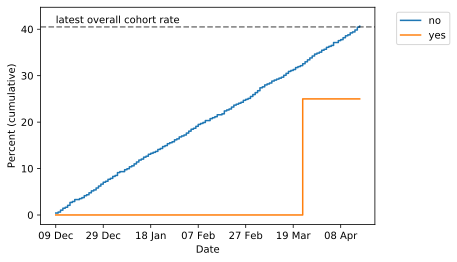

### DateCOVID vaccinations among 50-54 population
 ### by Current COPD

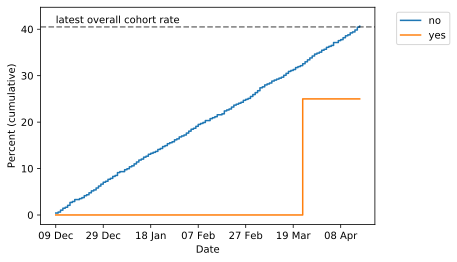

###  COVID vaccinations among 50-54 population
 ### by Psychosis, schizophrenia, or bipolar

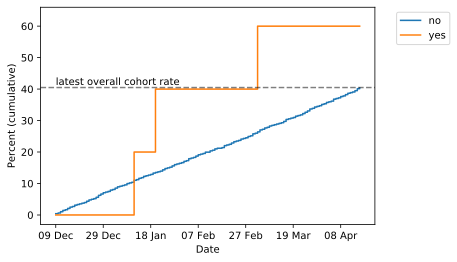

### DateCOVID vaccinations among 50-54 population
 ### by Psychosis, schizophrenia, or bipolar

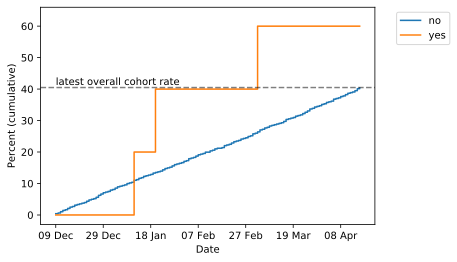

###  COVID vaccinations among 50-54 population
 ### by SSRI (last 12 months)

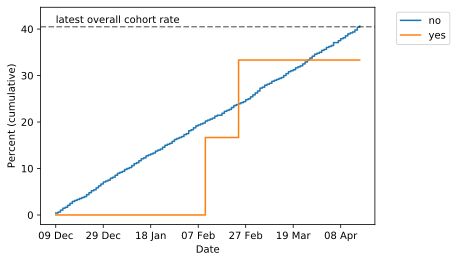

### DateCOVID vaccinations among 50-54 population
 ### by SSRI (last 12 months)

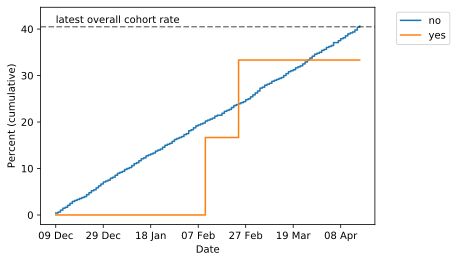

In [10]:
display(Markdown("## 50-54 population"))
chartlist2 = find_and_sort_filenames(foldername="figures", population_subset="50-54")
    
for item in chartlist2:
    show_chart(item)    

# 
## Vaccination rates of each eligible population group, according to demographic/clinical features  <a name='tables' />

In [11]:
tablelist = find_and_sort_filenames("tables", by_demographics_or_population="population", 
                            pre_string="among ", tail_string=" population.csv",
                            population_subset="",
                            files_to_exclude=[])
    
for filename in tablelist:
    show_table(filename, latest_date_fmt, show_carehomes=True, suffix=suffix)

## 
 ## Cumulative vaccination figures among 80+ population 
 Please refer to footnotes below table for information.

Vaccinated at 16 Apr (n)  \
Category                                  Group                                                           
overall                                   overall                                                   831   
Sex                                       F                                                         406   
                                          M                                                         427   
Age band                                  0                                                          49   
                                          0-15                                                       49   
                                          16-29                                                      56   
                                          30-34                                                      56   
                                          35-39                                                      42   
                                          40-44                                                      63   
                                          45-49                                                      56   
                                          50-54                                                      42   
                                          55-59                                                      49   
                                          60-64                                                      56   
                                          65-69                                                      42   
                                          70-74                                                      63   
                                          75-79                                                      49   
                                          80-84                                                      56   
                                          85-89                                                      56   
                                          90+                                                        42   
Ethnicity (broad categories)              Black                                                     154   
                                          Mixed                                                     147   
                                          Other                                                     133   
                                          South Asian                                               126   
                                          Unknown                                                   133   
                                          White                                                     147   
ethnicity 16 groups                        African                                                   49   
                                           Bangladeshi or British Bangladeshi                        56   
                                           Caribbean                                                 49   
                                           Chinese                                                   35   
                                           Other                                                     42   
                                           Other Asian                                               49   
                                          British or Mixed British                                   42   
                                          Indian or British Indian                                   42   
                                          Irish                                                      35   
                                          Other Black                                                42   
                                          Other White                                                42   
             

**Footnotes:**
- Patient counts rounded to the nearest 7

- Population excludes those known to live in an elderly care home, based upon clinical coding.

- SSRIs group excludes individuals with Psychosis/ schizophrenia/bipolar, LD, or Dementia.

## 
 ## Cumulative vaccination figures among 70-79 population 
 Please refer to footnotes below table for information.

Vaccinated at 16 Apr (n)  \
Category                                  Group                                                           
overall                                   overall                                                  1354   
Sex                                       F                                                         693   
                                          M                                                         658   
Age band                                  0                                                          84   
                                          0-15                                                       70   
                                          16-29                                                      84   
                                          30-34                                                      91   
                                          35-39                                                      98   
                                          40-44                                                      91   
                                          45-49                                                      98   
                                          50-54                                                      70   
                                          55-59                                                      84   
                                          60-64                                                      77   
                                          65-69                                                      84   
                                          70-74                                                      91   
                                          75-79                                                      84   
                                          80-84                                                      77   
                                          85-89                                                      84   
                                          90+                                                        91   
Ethnicity (broad categories)              Black                                                     231   
                                          Mixed                                                     217   
                                          Other                                                     217   
                                          South Asian                                               245   
                                          Unknown                                                   203   
                                          White                                                     238   
ethnicity 16 groups                        African                                                   63   
                                           Bangladeshi or British Bangladeshi                        77   
                                           Caribbean                                                 84   
                                           Chinese                                                   70   
                                           Other                                                     84   
                                           Other Asian                                               70   
                                          British or Mixed British                                   63   
                                          Indian or British Indian                                   77   
                                          Irish                                                      77   
                                          Other Black                                                56   
                                          Other White                                                56   
             

**Footnotes:**
- Patient counts rounded to the nearest 7

- Population excludes those known to live in an elderly care home, based upon clinical coding.

- SSRIs group excludes individuals with Psychosis/ schizophrenia/bipolar, LD, or Dementia.

## 
 ## Cumulative vaccination figures among care home population 
 Please refer to footnotes below table for information.

Vaccinated at 16 Apr (n)  \
Category                     Group                                   
overall                      overall                           555   
Sex                          F                                 280   
                             M                                 280   
Age band                     0                                  56   
                             0-15                               35   
                             16-29                              35   
                             30-34                              35   
                             35-39                              35   
                             40-44                              35   
                             45-49                              35   
                             50-54                              35   
                             55-59                              21   
                             60-64                              28   
                             65-69                              35   
                             70-74                              35   
                             75-79                              42   
                             80-84                              28   
                             85-89                              35   
                             90+                                35   
Ethnicity (broad categories) Black                              84   
                             Mixed                              98   
                             Other                              91   
                             South Asian                        98   
                             Unknown                            84   
                             White                              91   
Dementia                     no                                553   
                             yes                                 0   

                                          Vaccinated at 16 Apr (%)  \
Category                     Group                                   
overall                      overall                          40.0   
Sex                          F                                38.5   
                             M                                42.6   
Age band                     0                                50.0   
                             0-15                             45.5   
                             16-29                            38.5   
                             30-34                            41.7   
                             35-39                            35.7   
                             40-44                            41.7   
                             45-49                            38.5   
                             50-54                            41.7   
                             55-59                            33.3   
                             60-64                            33.3   
                             65-69                            38.5   
                             70-74                            41.7   
                             75-79                            46.2   
                             80-84                            33.3   
                             85-89                            45.5   
                             90+                              45.5   
Ethnicity (broad categories) Black                            34.3   
                             Mixed                            41.2   
                             Other                            39.4   
                             South Asian                      43.8   
                             Unknown                          40.0   
                             White                            38.2   
Dementia                     no                               40.5   
                             yes                   

**Footnotes:**
- Patient counts rounded to the nearest 7

- Population includes those known to live in an elderly care home, based upon clinical coding.

## 
 ## Cumulative vaccination figures among shielding (aged 16-69) population 
 Please refer to footnotes below table for information.

Vaccinated at 16 Apr (n)  \
Category                                  Group                                        
overall                                   overall                                180   
newly shielded since feb 15               no                                     175   
                                          yes                                      0   
Sex                                       F                                       98   
                                          M                                       84   
Age band                                  16-29                                   14   
                                          30-39                                   21   
                                          40-49                                   28   
                                          50-59                                   28   
                                          60-69                                   21   
                                          70-79                                   42   
                                          80+                                     21   
Ethnicity (broad categories)              Black                                   28   
                                          Mixed                                   35   
                                          Other                                   35   
                                          South Asian                             21   
                                          Unknown                                 28   
                                          White                                   35   
Index of Multiple Deprivation (quintiles) 1 Most deprived                         42   
                                          2                                       42   
                                          3                                       28   
                                          4                                       28   
                                          5 Least deprived                        28   
                                          Unknown                                 14   
Learning disability                       no                                     175   
                                          yes                                      0   

                                                            Vaccinated at 16 Apr (%)  \
Category                                  Group                                        
overall                                   overall                               41.5   
newly shielded since feb 15               no                                    41.0   
                                          yes                                    NaN   
Sex                                       F                                     45.2   
                                          M                                     38.7   
Age band                                  16-29                                 28.6   
                                          30-39                                 37.5   
                                          40-49                                 57.1   
                                          50-59                                 57.1   
                                          60-69                                 33.3   
                                          70-79                                 35.3   
                                          80+                                   37.5   
Ethnicity (broad categories)              Black                                 40.0   
                                          Mixed                                 45.5   
                                          Other                                 45.5   
                                          South Asian                           33.3   
           

**Footnotes:**
- Patient counts rounded to the nearest 7

- Population excludes those over 65 known to live in an elderly care home, based upon clinical coding.

## 
 ## Cumulative vaccination figures among 65-69 population 
 Please refer to footnotes below table for information.

Vaccinated at 16 Apr (n)  \
Category                                  Group                                                           
overall                                   overall                                                   859   
Sex                                       F                                                         434   
                                          M                                                         427   
Ethnicity (broad categories)              Black                                                     140   
                                          Mixed                                                     140   
                                          Other                                                     154   
                                          South Asian                                               154   
                                          Unknown                                                   140   
                                          White                                                     126   
ethnicity 16 groups                        African                                                   42   
                                           Bangladeshi or British Bangladeshi                        42   
                                           Caribbean                                                 42   
                                           Chinese                                                   35   
                                           Other                                                     49   
                                           Other Asian                                               42   
                                          British or Mixed British                                   42   
                                          Indian or British Indian                                   49   
                                          Irish                                                      56   
                                          Other Black                                                42   
                                          Other White                                                49   
                                          Other mixed                                                56   
                                          Pakistani or British Pakistani                             49   
                                          Unknown                                                   126   
                                          White + Asian                                              49   
                                          White + Black African                                      42   
                                          White + Black Caribbean                                    49   
Index of Multiple Deprivation (quintiles) 1 Most deprived                                           154   
                                          2                                                         182   
                                          3                                                         161   
                                          4                                                         147   
                                          5 Least deprived                                          154   
                                          Unknown                                                    56   
BMI                                       30+                                                       252   
                                          under 30                                                  609   
Chronic cardiac disease                   no                                                        854   
                                          yes                                                         0   
Current COPD 

**Footnotes:**
- Patient counts rounded to the nearest 7

- Population excludes those known to live in an elderly care home, based upon clinical coding.

- Population excludes those who are currently shielding.

- SSRIs group excludes individuals with Psychosis/ schizophrenia/bipolar, LD, or Dementia.

## 
 ## Cumulative vaccination figures among LD (aged 16-64) population 
 Please refer to footnotes below table for information.

Vaccinated at 16 Apr (n)  \
Category                     Group                                   
overall                      overall                           344   
Sex                          F                                 182   
                             M                                 161   
Age band                     0                                  14   
                             0-15                               28   
                             16-29                              21   
                             30-34                              21   
                             35-39                              35   
                             40-44                              21   
                             45-49                              21   
                             50-54                              21   
                             55-59                              21   
                             60-64                              21   
                             65-69                              21   
                             70-74                              21   
                             75-79                              21   
                             80-84                              21   
                             85-89                              28   
                             90+                                21   
Ethnicity (broad categories) Black                              56   
                             Mixed                              63   
                             Other                              56   
                             South Asian                        63   
                             Unknown                            49   
                             White                              63   

                                          Vaccinated at 16 Apr (%)  \
Category                     Group                                   
overall                      overall                          41.6   
Sex                          F                                40.6   
                             M                                42.6   
Age band                     0                                40.0   
                             0-15                             50.0   
                             16-29                            37.5   
                             30-34                            42.9   
                             35-39                            55.6   
                             40-44                            37.5   
                             45-49                            42.9   
                             50-54                            42.9   
                             55-59                            42.9   
                             60-64                            37.5   
                             65-69                            42.9   
                             70-74                            42.9   
                             75-79                            50.0   
                             80-84                            42.9   
                             85-89                            50.0   
                             90+                              37.5   
Ethnicity (broad categories) Black                            40.0   
                             Mixed                            47.4   
                             Other                            40.0   
                             South Asian                      45.0   
                             Unknown                          38.9   
                             White                            40.9   

                                          Total eligible  \
Category                     Group                         
overall                      overall                 826   
Sex                          F                       448   
                    

**Footnotes:**
- Patient counts rounded to the nearest 7

- Population excludes those who are currently shielding.

## 
 ## Cumulative vaccination figures among 60-64 population 
 Please refer to footnotes below table for information.

Vaccinated at 16 Apr (n)  \
Category                                  Group                                                           
overall                                   overall                                                  1079   
Sex                                       F                                                         546   
                                          M                                                         532   
Ethnicity (broad categories)              Black                                                     175   
                                          Mixed                                                     175   
                                          Other                                                     175   
                                          South Asian                                               182   
                                          Unknown                                                   168   
                                          White                                                     210   
ethnicity 16 groups                        African                                                   63   
                                           Bangladeshi or British Bangladeshi                        63   
                                           Caribbean                                                 84   
                                           Chinese                                                   49   
                                           Other                                                     49   
                                           Other Asian                                               77   
                                          British or Mixed British                                   42   
                                          Indian or British Indian                                   49   
                                          Irish                                                      56   
                                          Other Black                                                77   
                                          Other White                                                63   
                                          Other mixed                                                49   
                                          Pakistani or British Pakistani                             70   
                                          Unknown                                                   133   
                                          White + Asian                                              56   
                                          White + Black African                                      56   
                                          White + Black Caribbean                                    49   
Index of Multiple Deprivation (quintiles) 1 Most deprived                                           210   
                                          2                                                         210   
                                          3                                                         210   
                                          4                                                         189   
                                          5 Least deprived                                          217   
                                          Unknown                                                    42   
BMI                                       30+                                                       329   
                                          under 30                                                  749   
Chronic cardiac disease                   no                                                       1064   
                                          yes                                                        14   
Current COPD 

**Footnotes:**
- Patient counts rounded to the nearest 7

- Population excludes those who are currently shielding.

- SSRIs group excludes individuals with Psychosis/ schizophrenia/bipolar, LD, or Dementia.

## 
 ## Cumulative vaccination figures among 55-59 population 
 Please refer to footnotes below table for information.

Vaccinated at 16 Apr (n)  \
Category                                  Group                                                           
overall                                   overall                                                  1270   
Sex                                       F                                                         637   
                                          M                                                         630   
Ethnicity (broad categories)              Black                                                     224   
                                          Mixed                                                     210   
                                          Other                                                     203   
                                          South Asian                                               196   
                                          Unknown                                                   217   
                                          White                                                     224   
ethnicity 16 groups                        African                                                   70   
                                           Bangladeshi or British Bangladeshi                        56   
                                           Caribbean                                                 70   
                                           Chinese                                                   77   
                                           Other                                                     77   
                                           Other Asian                                               70   
                                          British or Mixed British                                   70   
                                          Indian or British Indian                                   63   
                                          Irish                                                      63   
                                          Other Black                                                63   
                                          Other White                                                77   
                                          Other mixed                                                63   
                                          Pakistani or British Pakistani                             63   
                                          Unknown                                                   196   
                                          White + Asian                                              63   
                                          White + Black African                                      56   
                                          White + Black Caribbean                                    56   
Index of Multiple Deprivation (quintiles) 1 Most deprived                                           252   
                                          2                                                         238   
                                          3                                                         245   
                                          4                                                         231   
                                          5 Least deprived                                          252   
                                          Unknown                                                    63   
BMI                                       30+                                                       371   
                                          under 30                                                  896   
Chronic cardiac disease                   no                                                       1260   
                                          yes                                                        14   
Current COPD 

**Footnotes:**
- Patient counts rounded to the nearest 7

- Population excludes those who are currently shielding.

- SSRIs group excludes individuals with Psychosis/ schizophrenia/bipolar, LD, or Dementia.

## 
 ## Cumulative vaccination figures among 50-54 population 
 Please refer to footnotes below table for information.

Vaccinated at 16 Apr (n)  \
Category                                  Group                                                           
overall                                   overall                                                  1378   
Sex                                       F                                                         665   
                                          M                                                         707   
Ethnicity (broad categories)              Black                                                     245   
                                          Mixed                                                     245   
                                          Other                                                     245   
                                          South Asian                                               238   
                                          Unknown                                                   189   
                                          White                                                     210   
ethnicity 16 groups                        African                                                   77   
                                           Bangladeshi or British Bangladeshi                        70   
                                           Caribbean                                                 70   
                                           Chinese                                                   63   
                                           Other                                                     77   
                                           Other Asian                                               77   
                                          British or Mixed British                                   70   
                                          Indian or British Indian                                   70   
                                          Irish                                                      77   
                                          Other Black                                                77   
                                          Other White                                                77   
                                          Other mixed                                                70   
                                          Pakistani or British Pakistani                             70   
                                          Unknown                                                   217   
                                          White + Asian                                              63   
                                          White + Black African                                      84   
                                          White + Black Caribbean                                    77   
Index of Multiple Deprivation (quintiles) 1 Most deprived                                           259   
                                          2                                                         238   
                                          3                                                         245   
                                          4                                                         280   
                                          5 Least deprived                                          280   
                                          Unknown                                                    77   
BMI                                       30+                                                       399   
                                          under 30                                                  980   
Chronic cardiac disease                   no                                                       1365   
                                          yes                                                        14   
Current COPD 

**Footnotes:**
- Patient counts rounded to the nearest 7

- Population excludes those who are currently shielding.

- SSRIs group excludes individuals with Psychosis/ schizophrenia/bipolar, LD, or Dementia.

## 
 ## Cumulative vaccination figures among 16-49, not in other eligible groups shown population 
 Please refer to footnotes below table for information.

Vaccinated at 16 Apr (n)  \
Category                                  Group                                                           
overall                                   overall                                                 12150   
Sex                                       F                                                        6223   
                                          M                                                        5929   
Age band                                  16-29                                                    1512   
                                          30-39                                                    1512   
                                          40-49                                                    1512   
                                          50-59                                                    1589   
                                          60-69                                                    1505   
                                          70-79                                                    2982   
                                          80+                                                      1540   
Ethnicity (broad categories)              Black                                                    1995   
                                          Mixed                                                    2107   
                                          Other                                                    2121   
                                          South Asian                                              2135   
                                          Unknown                                                  1792   
                                          White                                                    2002   
ethnicity 16 groups                        African                                                  637   
                                           Bangladeshi or British Bangladeshi                       651   
                                           Caribbean                                                672   
                                           Chinese                                                  672   
                                           Other                                                    658   
                                           Other Asian                                              630   
                                          British or Mixed British                                  637   
                                          Indian or British Indian                                  672   
                                          Irish                                                     665   
                                          Other Black                                               651   
                                          Other White                                               602   
                                          Other mixed                                               616   
                                          Pakistani or British Pakistani                            616   
                                          Unknown                                                  1813   
                                          White + Asian                                             672   
                                          White + Black African                                     658   
                                          White + Black Caribbean                                   623   
Index of Multiple Deprivation (quintiles) 1 Most deprived                                          2296   
                                          2                                                        2345   
                                          3                                                        2296   
             

**Footnotes:**
- Patient counts rounded to the nearest 7

- SSRIs group excludes individuals with Psychosis/ schizophrenia/bipolar, LD, or Dementia.

### 
## Appendix 
### Ethnicity coverage for each eligible group <a name='ethnicity' />

In [12]:
from create_report import get_savepath
savepath = get_savepath()
tab = pd.read_csv(os.path.join(savepath["text"], "ethnicity_coverage.csv")).set_index("group")
display(Markdown("- Ethnicity information is primarily retrieved from GP records. \
                 \n- Where missing in GP records, as of March 8 2021, it is then retrieved from hospital records if present. \
                 \n - For patients with multiple different ethnicities recorded, we use the most common non-missing ethnicity \
                 \n recorded in inpatients, outpatients or A&E over the last ~5 years (or latest if tied).\
                 \n- Patient counts are rounded to the nearest 7"))

tab[["total population (n)","ethnicity coverage (%)"]].drop("vaccinated 16-49, not in other eligible groups shown")

- Ethnicity information is primarily retrieved from GP records.                  
- Where missing in GP records, as of March 8 2021, it is then retrieved from hospital records if present.                  
 - For patients with multiple different ethnicities recorded, we use the most common non-missing ethnicity                  
 recorded in inpatients, outpatients or A&E over the last ~5 years (or latest if tied).                 
- Patient counts are rounded to the nearest 7

total population (n)  ethnicity coverage (%)
group                                                               
80+                                     2044                    85.3
70-79                                   3437                    84.5
care home                               1386                    84.8
shielding (aged 16-69)                   434                    82.3
65-69                                   2184                    84.0
LD (aged 16-64)                          826                    85.6
60-64                                   2716                    85.3
55-59                                   3192                    84.2
50-54                                   3402                    86.0